# Predicting Wildfire Magnitude

Aim: We want to predict the magnitude of forest fires from factors such as location, physical conditions up to and during and cause of fire etc using a regression neural network.

Purpose: With this model it will be easier for affected parties (e.g. insurance companies, councils and families) to deal with its aftermath.

Extension: We could try to estimate potential economic loss using the magnitude prediction.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
# import data
df = pd.read_csv("./FW_Veg_Rem_Combined.csv")

# restrict to california
df_CA = df[df['state'] == 'CA']

# clean data - remove unwanted columns

columns_to_keep = ["latitude", "Temp_pre_7", "Temp_cont",
                   "Wind_pre_7", "Wind_cont", "Hum_pre_7", "Hum_cont", "Prec_pre_7", "Prec_cont", "fire_mag"]

df_clean = df_CA[columns_to_keep]

# randomise which datapoints are in the train and which is in the test
shuffled_indices = np.random.permutation(len(df_clean))
df_shuffled = df_clean.iloc[shuffled_indices]
cat_columns = df_shuffled.select_dtypes(include=["object"]).columns

train_perc = 0.8

train_data = df_shuffled[:int(train_perc * len(df_shuffled))] # last n is train data
test_data = df_shuffled[int(train_perc * len(df_shuffled)):] # first N - n is test data

x_train = train_data.drop("fire_mag", axis=1, inplace=False)
x_test = test_data.drop("fire_mag", axis=1, inplace=False)

y_train = train_data["fire_mag"]
y_test = test_data["fire_mag"]
x_train

In [163]:
# may have to experiment with parameters
hidden_units1 = 10
hidden_units2 = 100
hidden_units3 = 75
learning_rate = 0.0001

# create model using the Sequential in tensorflow
# have used relu as outplut layer because we want a positive value as an output of magnitude
def build_model_using_sequential():
    model = Sequential([Dense(hidden_units1, kernel_initializer='normal', activation=tf.nn.relu), Dropout(0.2),
                        Dense(hidden_units2, kernel_initializer='normal', activation=tf.nn.relu), Dropout(0.2),
                        Dense(hidden_units3, kernel_initializer='normal', activation=tf.nn.relu),
                        Dense(1, kernel_initializer='normal', activation='relu')])
    return model

model = build_model_using_sequential()

In [164]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=SGD(learning_rate=learning_rate), metrics=[msle])

# train the model
history = model.fit(x_train.values, y_train.values, epochs=100, batch_size=64,validation_split=0.2)

Epoch 1/100
39/39 [==============================] - 1s 9ms/step - loss: 3.1165 - mean_squared_logarithmic_error: 3.0951 - val_loss: 3.7045 - val_mean_squared_logarithmic_error: 3.7059
Epoch 2/100
39/39 [==============================] - 0s 935us/step - loss: 3.1089 - mean_squared_logarithmic_error: 3.1289 - val_loss: 3.6952 - val_mean_squared_logarithmic_error: 3.6968
Epoch 3/100
39/39 [==============================] - 0s 980us/step - loss: 3.0958 - mean_squared_logarithmic_error: 3.0969 - val_loss: 3.6747 - val_mean_squared_logarithmic_error: 3.6765
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 3.0750 - mean_squared_logarithmic_error: 3.0879 - val_loss: 3.6379 - val_mean_squared_logarithmic_error: 3.6399
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 3.0445 - mean_squared_logarithmic_error: 3.0215 - val_loss: 3.5946 - val_mean_squared_logarithmic_error: 3.5966
Epoch 6/100
39/39 [==============================] - 0s 953us/step - lo

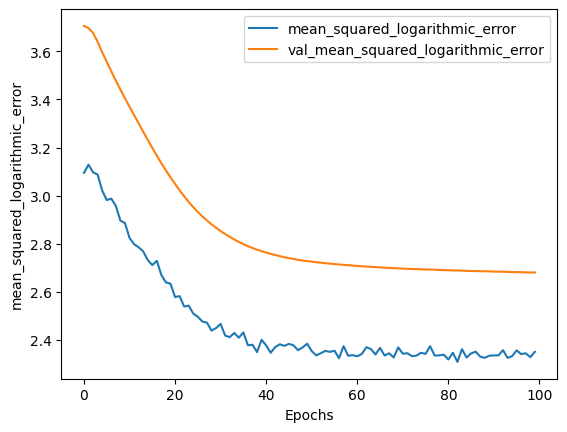

In [165]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [166]:
# predict data
pred_values = model.predict(x_test)

25/25 [==============================] - 0s 411us/step


In [167]:
print(np.max(pred_values))

2.2069175
